In [1]:
import pathlib

imgdir_path = pathlib.Path('cat_dog_images')
file_list = sorted([str(path) for path in imgdir_path.glob('*.jpg')])

print(file_list)

['cat_dog_images/cat-01.jpg', 'cat_dog_images/cat-02.jpg', 'cat_dog_images/cat-03.jpg', 'cat_dog_images/dog-01.jpg', 'cat_dog_images/dog-02.jpg', 'cat_dog_images/dog-03.jpg']


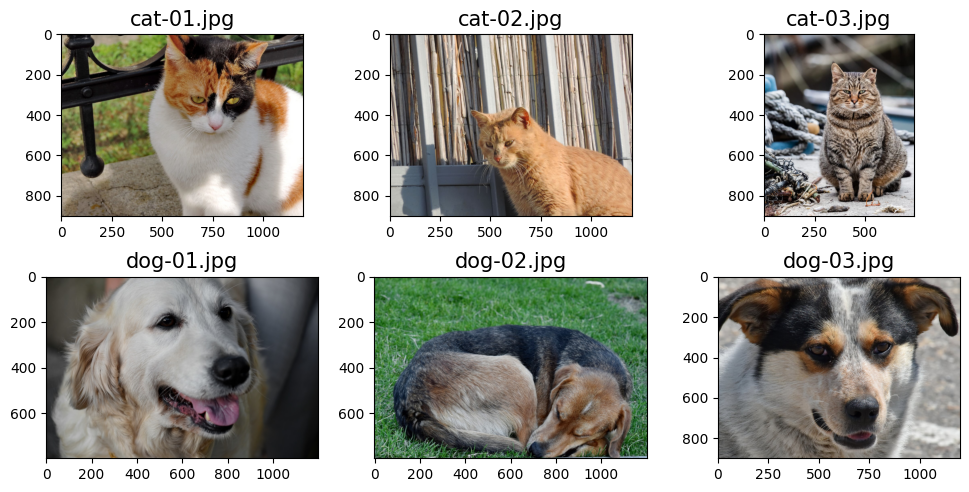

In [2]:
import matplotlib.pyplot as plt
import os
from PIL import Image

fig = plt.figure(figsize=(10, 5))
for i, file in enumerate(file_list):
    img = Image.open(file)

    ax = fig.add_subplot(2, 3, i+1)
    ax.imshow(img)
    ax.set_title(os.path.basename(file), size=15)

plt.tight_layout()
plt.show()

In [3]:
labels = [1 if 'dog' in os.path.basename(file) else 0
                                 for file in file_list]
print(labels)

[0, 0, 0, 1, 1, 1]


In [5]:
from torch.utils.data import Dataset
class ImageDataset(Dataset):
    def __init__(self, file_list, labels) -> None:
        super().__init__()
        self.file_list = file_list
        self.labels = labels

    def __getitem__(self, index):
        return self.file_list[index], self.labels[index]
    
    def __len__(self):
        return len(self.labels)
    

image_dataset = ImageDataset(file_list, labels)

for file, label in image_dataset:
    print(file, label)
    

cat_dog_images/cat-01.jpg 0
cat_dog_images/cat-02.jpg 0
cat_dog_images/cat-03.jpg 0
cat_dog_images/dog-01.jpg 1
cat_dog_images/dog-02.jpg 1
cat_dog_images/dog-03.jpg 1


/home/tej/Documents/Courses/Learning/ML_With_PyTorch_Scikit_Practice/env/lib/python3.10/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


torch.Size([3, 80, 120])
torch.Size([3, 80, 120])
torch.Size([3, 80, 120])
torch.Size([3, 80, 120])
torch.Size([3, 80, 120])
torch.Size([3, 80, 120])


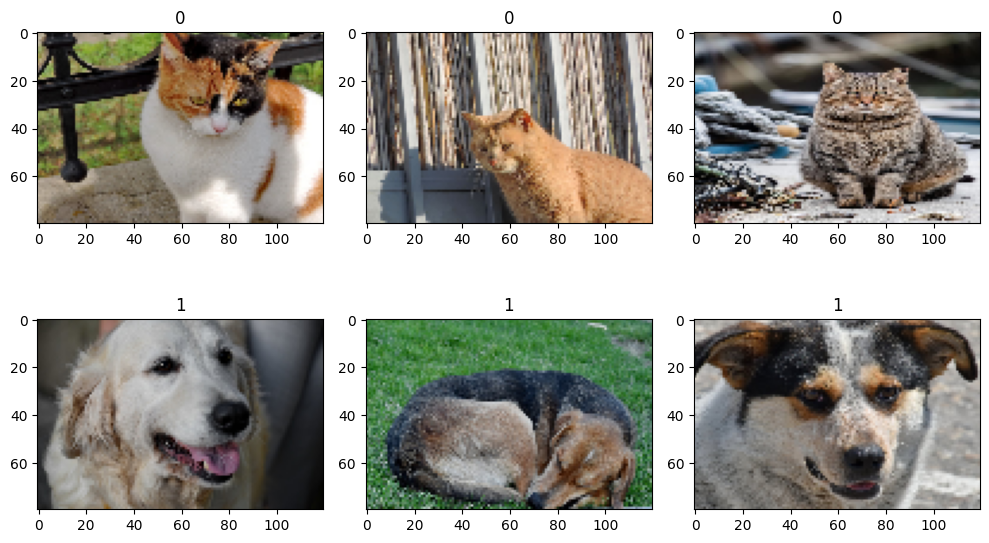

In [10]:
import torchvision.transforms as imgtransforms

img_height, img_width = 80, 120
xtransform = imgtransforms.Compose(
    [
        imgtransforms.ToTensor(),
        imgtransforms.Resize((img_height, img_width))
    ]
)


class ImageDataset(Dataset):
    def __init__(self, file_list, labels, transform) -> None:
        super().__init__()
        self.file_list = file_list
        self.labels = labels
        self.transform = transform

    def __getitem__(self, index):
        img = Image.open(file_list[index])
        if self.transform is not None:
            img = self.transform(img)
        label = self.labels[index]
        return img, label
    
    def __len__(self):
        return len(self.labels)
    

image_dataset = ImageDataset(file_list, labels, xtransform)

fig = plt.figure(figsize=(10, 6))
for i, example in enumerate(image_dataset):
    ax = fig.add_subplot(2, 3, i+1)
    print(example[0].shape)
    ax.imshow(example[0].numpy().transpose(1,2,0))
    ax.set_title(example[1])

plt.tight_layout()
plt.show()
